## 1. Load the Dataset:

In [95]:
import pandas as pd

# Replace 'your_dataset.csv' with the actual file path or URL of your dataset
df = pd.read_csv('amazon_ebook_Data.csv')


In [96]:
df.head()

,Unnamed: 0,market_place,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,Sentiment_ebook
0,0,"""US""","""33605939""","""RGYFDX8QXKEIR""","""B007KO2MLO""","""328837464""","""Big Maria""","""Digital_Ebook_Purchase""",1,0,0,0 \t(N),0 \t(N),"""Quirky""","""Elmore Leonard meets the cast of Sierra Madre...",2013-09-09,positive
1,1,"""US""","""34058393""","""R13CBGTMNV9R8Z""","""B005FLODDE""","""764276359""","""The Woman Who Wasn't There: The True Story of...","""Digital_Ebook_Purchase""",1,1,2,0 \t(N),1 \t(Y),"""The Woman Who Wasn't There""","""This book was very interesting. It is a true ...",2013-09-09,positive
2,2,"""US""","""39601147""","""R7DRFHC0F71O0""","""B00EA3L35O""","""535606445""","""Mary had A Sleepy Sheep""","""Digital_Ebook_Purchase""",1,0,0,0 \t(N),0 \t(N),"""This Sleepy Sheep rocks!""","""I had the opportunity to review Mary had a Sl...",2013-09-09,positive
3,3,"""US""","""17351407""","""R27LUKEXU3KBXQ""","""B00BL3JV50""","""240053004""","""Starstruck""","""Digital_Ebook_Purchase""",1,1,1,0 \t(N),1 \t(Y),"""Steamy and suspenseful!!!!!""","""What a great read! I really couldn't put this...",2013-09-09,positive
4,4,"""US""","""10463387""","""R1VXTPUYMNU687""","""B00CXU7U80""","""931529805""","""The Complete Conan Saga""","""Digital_Ebook_Purchase""",1,1,2,0 \t(N),0 \t(N),"""Barbarians""","""Barbarians need love too ! Short stories work...",2013-09-09,positive


## 2.Explore the Data:

In [97]:
df.drop(columns=['review_id','product_id','vine','product_parent','review_headline','review_body'],inplace=True)

In [98]:
df.head()

,Unnamed: 0,market_place,customer_id,product_title,product_category,star_rating,helpful_votes,total_votes,verified_purchase,review_date,Sentiment_ebook
0,0,"""US""","""33605939""","""Big Maria""","""Digital_Ebook_Purchase""",1,0,0,0 \t(N),2013-09-09,positive
1,1,"""US""","""34058393""","""The Woman Who Wasn't There: The True Story of...","""Digital_Ebook_Purchase""",1,1,2,1 \t(Y),2013-09-09,positive
2,2,"""US""","""39601147""","""Mary had A Sleepy Sheep""","""Digital_Ebook_Purchase""",1,0,0,0 \t(N),2013-09-09,positive
3,3,"""US""","""17351407""","""Starstruck""","""Digital_Ebook_Purchase""",1,1,1,1 \t(Y),2013-09-09,positive
4,4,"""US""","""10463387""","""The Complete Conan Saga""","""Digital_Ebook_Purchase""",1,1,2,0 \t(N),2013-09-09,positive


In [99]:
# Display basic statistics (mean, median, standard deviation)
statistics_summary = df.describe()

# Check for missing values
missing_values = df.isnull().sum()

# Identify outliers using box plots for numerical columns
# Example for a single column 'numeric_column':
# df.boxplot(column='numeric_column')
# plt.show()

# Or identify outliers using IQR (Interquartile Range)
# Example for a single column 'numeric_column':
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < Q1 - 1.5 * IQR) | (df > Q3 + 1.5 * IQR)).sum()

# Print the results
print("Basic Statistics:")
print(statistics_summary)

print("\nMissing Values:")
print(missing_values)



Basic Statistics:
       Unnamed: 0  star_rating  helpful_votes  total_votes
count  100.000000   100.000000     100.000000   100.000000
mean    49.500000     0.820000       1.580000     2.220000
std     29.011492     0.386123       5.005411     6.586764
min      0.000000     0.000000       0.000000     0.000000
25%     24.750000     1.000000       0.000000     0.000000
50%     49.500000     1.000000       0.000000     0.000000
75%     74.250000     1.000000       1.000000     2.000000
max     99.000000     1.000000      36.000000    47.000000

Missing Values:
Unnamed: 0           0
market_place         0
customer_id          0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
verified_purchase    0
review_date          0
Sentiment_ebook      0
dtype: int64


C:\Users\ASUS\AppData\Local\Temp/ipykernel_4300/3547764702.py:17: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < Q1 - 1.5 * IQR) | (df > Q3 + 1.5 * IQR)).sum()


## 3. Data Cleaning 

In [100]:
df.drop(columns=['market_place'],inplace=True)

In [101]:
df.head()

,Unnamed: 0,customer_id,product_title,product_category,star_rating,helpful_votes,total_votes,verified_purchase,review_date,Sentiment_ebook
0,0,"""33605939""","""Big Maria""","""Digital_Ebook_Purchase""",1,0,0,0 \t(N),2013-09-09,positive
1,1,"""34058393""","""The Woman Who Wasn't There: The True Story of...","""Digital_Ebook_Purchase""",1,1,2,1 \t(Y),2013-09-09,positive
2,2,"""39601147""","""Mary had A Sleepy Sheep""","""Digital_Ebook_Purchase""",1,0,0,0 \t(N),2013-09-09,positive
3,3,"""17351407""","""Starstruck""","""Digital_Ebook_Purchase""",1,1,1,1 \t(Y),2013-09-09,positive
4,4,"""10463387""","""The Complete Conan Saga""","""Digital_Ebook_Purchase""",1,1,2,0 \t(N),2013-09-09,positive


In [102]:
df.product_title.nunique()

99

In [103]:
df.drop_duplicates(inplace=True)
df.product_title.nunique()

99

In [104]:
# removiing quotes along with the name
def handle_quotation_marks(value):
    value=str(value)
    value=value.split('"')
    value=value[1]
    return value
df['product_title']=df['product_title'].apply(handle_quotation_marks)
df.head()

,Unnamed: 0,customer_id,product_title,product_category,star_rating,helpful_votes,total_votes,verified_purchase,review_date,Sentiment_ebook
0,0,"""33605939""",Big Maria,"""Digital_Ebook_Purchase""",1,0,0,0 \t(N),2013-09-09,positive
1,1,"""34058393""",The Woman Who Wasn't There: The True Story of ...,"""Digital_Ebook_Purchase""",1,1,2,1 \t(Y),2013-09-09,positive
2,2,"""39601147""",Mary had A Sleepy Sheep,"""Digital_Ebook_Purchase""",1,0,0,0 \t(N),2013-09-09,positive
3,3,"""17351407""",Starstruck,"""Digital_Ebook_Purchase""",1,1,1,1 \t(Y),2013-09-09,positive
4,4,"""10463387""",The Complete Conan Saga,"""Digital_Ebook_Purchase""",1,1,2,0 \t(N),2013-09-09,positive


In [105]:
df["product_category"]=df["product_category"].apply(handle_quotation_marks)
df.head()

,Unnamed: 0,customer_id,product_title,product_category,star_rating,helpful_votes,total_votes,verified_purchase,review_date,Sentiment_ebook
0,0,"""33605939""",Big Maria,Digital_Ebook_Purchase,1,0,0,0 \t(N),2013-09-09,positive
1,1,"""34058393""",The Woman Who Wasn't There: The True Story of ...,Digital_Ebook_Purchase,1,1,2,1 \t(Y),2013-09-09,positive
2,2,"""39601147""",Mary had A Sleepy Sheep,Digital_Ebook_Purchase,1,0,0,0 \t(N),2013-09-09,positive
3,3,"""17351407""",Starstruck,Digital_Ebook_Purchase,1,1,1,1 \t(Y),2013-09-09,positive
4,4,"""10463387""",The Complete Conan Saga,Digital_Ebook_Purchase,1,1,2,0 \t(N),2013-09-09,positive


## 4. Data Transformation:

In [106]:
df.total_votes.value_counts()


0     57
1     16
2     11
3      4
8      2
5      2
4      2
47     1
26     1
6      1
12     1
11     1
36     1
Name: total_votes, dtype: int64

In [107]:
#checking if there are any wrong entries
# as number of helpful votes can never be greater than total votes
df[df['total_votes']<df['helpful_votes']]

,Unnamed: 0,customer_id,product_title,product_category,star_rating,helpful_votes,total_votes,verified_purchase,review_date,Sentiment_ebook


In [108]:
df.verified_purchase.value_counts()

1 \t(Y)    79
0 \t(N)    21
Name: verified_purchase, dtype: int64

In [109]:
#here we can see there are only two outputs but they have special characters and are not clear.
#therefore we need to handle this column and clean it.

def handle_verified_purchase(value):
    value=value[4]
    return value

In [110]:
df['verified_purchase']=df['verified_purchase'].apply(handle_verified_purchase)
df.head()

,Unnamed: 0,customer_id,product_title,product_category,star_rating,helpful_votes,total_votes,verified_purchase,review_date,Sentiment_ebook
0,0,"""33605939""",Big Maria,Digital_Ebook_Purchase,1,0,0,N,2013-09-09,positive
1,1,"""34058393""",The Woman Who Wasn't There: The True Story of ...,Digital_Ebook_Purchase,1,1,2,Y,2013-09-09,positive
2,2,"""39601147""",Mary had A Sleepy Sheep,Digital_Ebook_Purchase,1,0,0,N,2013-09-09,positive
3,3,"""17351407""",Starstruck,Digital_Ebook_Purchase,1,1,1,Y,2013-09-09,positive
4,4,"""10463387""",The Complete Conan Saga,Digital_Ebook_Purchase,1,1,2,N,2013-09-09,positive


In [111]:
#here we can see that verified_purchase column has been cleaned.
df.verified_purchase.value_counts()

Y    79
N    21
Name: verified_purchase, dtype: int64

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   customer_id        100 non-null    object
 2   product_title      100 non-null    object
 3   product_category   100 non-null    object
 4   star_rating        100 non-null    int64 
 5   helpful_votes      100 non-null    int64 
 6   total_votes        100 non-null    int64 
 7   verified_purchase  100 non-null    object
 8   review_date        100 non-null    object
 9   Sentiment_ebook    100 non-null    object
dtypes: int64(4), object(6)
memory usage: 8.6+ KB


In [113]:
#here we can see that the dtype is onject hence we should try to change it to datetime for 
#easy and efficient handeling
from datetime import datetime


def handle_date(value):
    value= datetime.strptime(value, '%Y-%m-%d')
    
    return value

In [114]:
df['review_date']=df['review_date'].apply(handle_date)
df.head()

,Unnamed: 0,customer_id,product_title,product_category,star_rating,helpful_votes,total_votes,verified_purchase,review_date,Sentiment_ebook
0,0,"""33605939""",Big Maria,Digital_Ebook_Purchase,1,0,0,N,2013-09-09,positive
1,1,"""34058393""",The Woman Who Wasn't There: The True Story of ...,Digital_Ebook_Purchase,1,1,2,Y,2013-09-09,positive
2,2,"""39601147""",Mary had A Sleepy Sheep,Digital_Ebook_Purchase,1,0,0,N,2013-09-09,positive
3,3,"""17351407""",Starstruck,Digital_Ebook_Purchase,1,1,1,Y,2013-09-09,positive
4,4,"""10463387""",The Complete Conan Saga,Digital_Ebook_Purchase,1,1,2,N,2013-09-09,positive


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         100 non-null    int64         
 1   customer_id        100 non-null    object        
 2   product_title      100 non-null    object        
 3   product_category   100 non-null    object        
 4   star_rating        100 non-null    int64         
 5   helpful_votes      100 non-null    int64         
 6   total_votes        100 non-null    int64         
 7   verified_purchase  100 non-null    object        
 8   review_date        100 non-null    datetime64[ns]
 9   Sentiment_ebook    100 non-null    object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 8.6+ KB


## 5. Data Visualization:

In [116]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='verified_purchase', ylabel='count'>

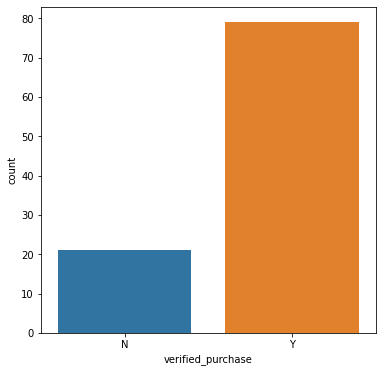

In [117]:
plt.figure(figsize=(6,6))
sns.countplot(df['verified_purchase'])

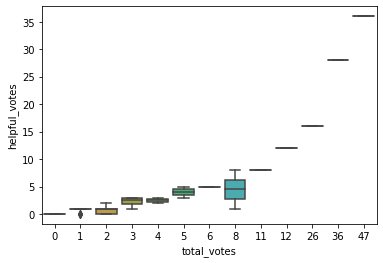

In [118]:
df_1=df.groupby(['verified_purchase'])['star_rating'].value_counts()
df[(df['star_rating']==1) & (df['Sentiment_ebook']=='negative')]
sns.boxplot(x=df['total_votes'], y=df['helpful_votes'])
plt.show()

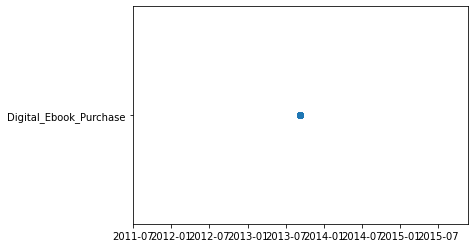

In [119]:
plt.scatter(df['review_date'], df['product_category'])
plt.show()

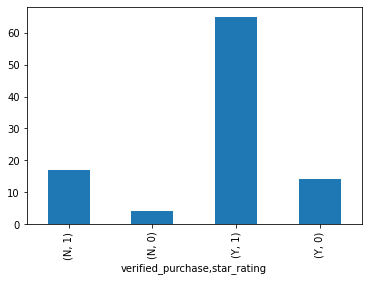

In [120]:
# Here we can see that among the verified purchases 67 have given 1 as star_rating and 9 have given 0 as star rating. Similarly for non-verified purchases 17 have given 1 star and 7 have gives 0 star as star raiting.
df_1.plot(kind='bar')
plt.show()

<Axes: xlabel='verified_purchase', ylabel='count'>

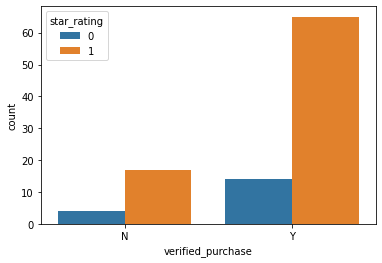

In [121]:
sns.countplot(data=df,x='verified_purchase',hue='star_rating')

## 6. Export the Cleaned Data:

In [122]:
# Replace 'cleaned_dataset.csv' with the desired file name
df.to_csv('cleaned_dataset.csv', index=False)

## 7.Data Quality Report:

1.Loaded the dataset 'amazon_ebook_Data.csv' using pandas and displayed the first few rows to get an initial overview.
2.Dropped unnecessary columns ('review_id', 'product_id', 'vine', 'product_parent', 'review_headline', 'review_body')
and displayed basic statistics, checked for missing values, and identified outliers.
3.Removed another unnecessary column ('market_place') and standardized the 'verified_purchase' column. Handled quotation marks in the 'product_title' and 'product_category' columns.
4.Handled data quality issues in the 'total_votes' column, ensuring that the number of helpful votes is never greater than total votes. Also, converted the 'review_date' column to datetime format.
5.Utilized seaborn and matplotlib for data visualization, including count plots, box plots, and scatter plots.
6.Saved the cleaned dataset to 'cleaned_dataset.csv' for future analysis.